# Trigonometric Interpolation

## Problem

With the function

$$ f(x) = |x| $$

on the interval $ [-\pi, \pi], $ calculate the trigonometric interpolants of $f.$

## Solution

As the function is real, the discrete cosine tranformation can be used as a simplification of the DFT:

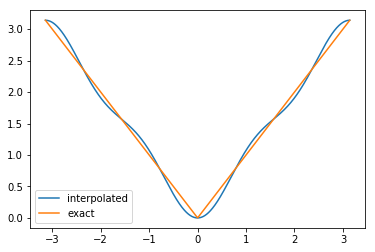

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline


def f(x):
    return np.abs(x)


def cos_trans(f, n, m=2000):
    A = np.zeros((n, n))
    nodes = np.linspace(0, np.pi, n, endpoint=False)
    y = f(nodes - np.pi)
    for i in range(n):
        for k in range(n):
            A[i, k] = np.cos(k*nodes[i])

    p = linalg.solve(A, y)
    x0 = np.linspace(0, 2*np.pi, m)
    y1 = np.zeros((m, 1))

    for i in range(y1.size):
        s = 0
        for k in range(p.size):
            s += p[k]*np.cos(k*x0[i])
        y1[i] = s

    return y1


n = 4
m = 2000
z0 = cos_trans(f, n, m)
x = np.linspace(-np.pi, np.pi, m)

plt.plot(x, z0, label='interpolated')
plt.plot(x, f(x), label='exact')
plt.legend();

## Comparison to polynomial interpolation

Trigonometric interpolation does not accumulate error with equally-spaced nodes.

In [2]:
# the aitken_neville scheme from ../polyinterp/
def aitken_neville(t: np.ndarray, f: np.ndarray, x) -> np.ndarray:
    """Evaluate the interpolating polynomial at the value of x0

    Arguments:
    t -- nodes
    f -- values
    x -- point to evaluate the interpolating polynomial at
    """
    f = f.copy()
    for k in range(1, len(f)):
        for j in range(len(f)-1, k-1, -1):
            f[j] = f[j] + (x - t[j])/(t[j] - t[j-k])*(f[j] - f[j-1])

    return f[-1]

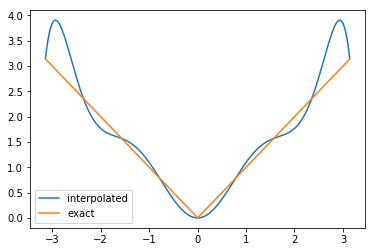

In [3]:
nodes = np.linspace(-np.pi, np.pi, n*2+1)
values = f(nodes)

x3 = np.linspace(nodes[0], nodes[-1], m)
p = np.zeros_like(x3)
for i in range(len(x3)):
    p[i] = aitken_neville(nodes, values, x[i])

plt.plot(x3, p, label='interpolated')
plt.plot(x, f(x), label='exact')
plt.legend();